# Imports and Data Frame Creation

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns

In [3]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [4]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101695,71496,6,3,10,10,9,27,18,15,...,1,4,4,2,2,2,2,2,2,3
top,?,?,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,72,48,76099,54708,26068,98569,53974,60195,57471,17745,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [8]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [9]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

       encounter_id patient_nbr             race  gender       age    weight  \
1306              ?     2079882  AfricanAmerican  Female   [50-60)         ?   
3630              ?     2231748        Caucasian    Male   [70-80)         ?   
4398              ?    37234413        Caucasian  Female   [50-60)         ?   
5184              ?     4042314  AfricanAmerican    Male   [60-70)         ?   
5919              ?     3854709  AfricanAmerican  Female   [60-70)         ?   
7455              ?    96422787  AfricanAmerican  Female   [60-70)         ?   
9541              ?    22869864            Other  Female   [70-80)         ?   
10532             ?     8191458        Caucasian  Female   [70-80)         ?   
11426             ?    81931500        Caucasian  Female   [10-20)         ?   
13226             ?     3664665        Caucasian  Female   [60-70)         ?   
13459             ?     3840570            Other    Male   [60-70)   [50-75)   
14488             ?    10766097        C

       encounter_id patient_nbr             race  gender       age weight  \
0           2278392     8222157        Caucasian  Female    [0-10)      ?   
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
9             15738    63555939        Caucasian  Female  [90-100)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   

       encounter_id patient_nbr             race  gender       age weight  \
0           2278392     8222157        Caucasian  Female    [0-10)      ?   
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
9             15738    63555939        Caucasian  Female  [90-100)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   

       encounter_id patient_nbr             race  gender       age     weight  \
2142       13918476     3011436  AfricanAmerican  Female   [30-40)          ?   
3104       19695054       93087        Caucasian  Female   [60-70)          ?   
5438       28384788      633906        Caucasian  Female  [90-100)          ?   
5801       29622804    16918047        Caucasian    Male   [70-80)          ?   
6008       30437346    17560062        Caucasian    Male   [60-70)          ?   
6762       33039570     3378627        Caucasian    Male   [70-80)          ?   
8572       38532630    61754247        Caucasian    Male   [80-90)          ?   
9594       41595798    71245980  AfricanAmerican    Male   [70-80)          ?   
9823       42247416     7331238        Caucasian  Female   [60-70)          ?   
10863      45590292     3328920        Caucasian    Male   [80-90)          ?   
12827      51769728     1691712        Caucasian  Female   [80-90)          ?   
14406      56183010     6142

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

In [10]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [11]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [12]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [13]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.070751
patient_nbr                  0.047167
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.030462
discharge_disposition_id     0.061907
admission_source_id          0.035375
time_in_hospital             0.058959
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.086473
num_procedures               0.018670
num_medications              0.094334
number_outpatient            0.025549
number_emergency             0.057976
number_inpatient             0.092369
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.057976
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [14]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [15]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [16]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [18]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

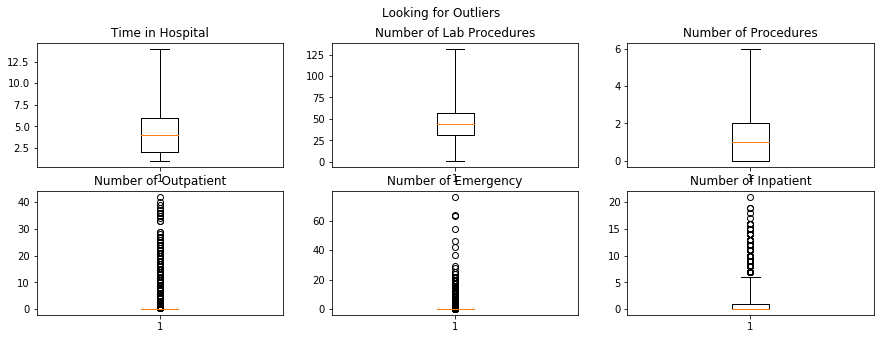

In [19]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [20]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

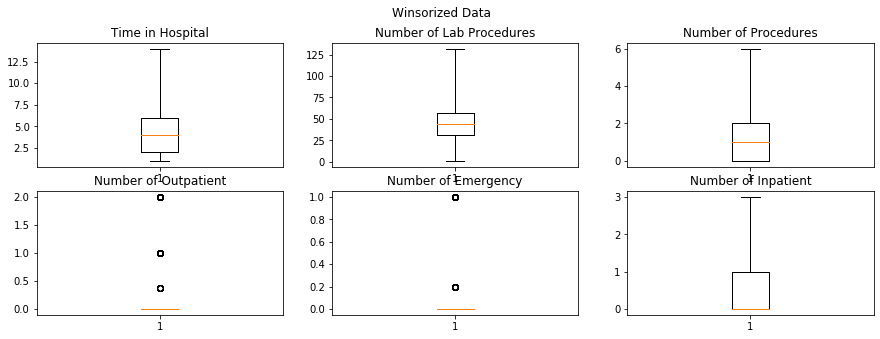

In [21]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [22]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [23]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101735 non-null float64
discharge_disposition_id    101703 non-null float64
admission_source_id         101730 non-null float64
num_medications             101670 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101707 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [24]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [25]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [26]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [27]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


## Determine Relationship between Race and Readmission

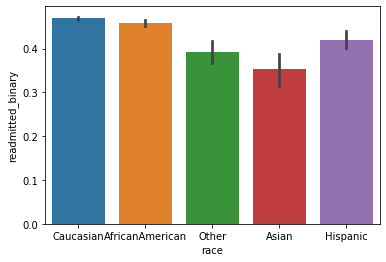

In [43]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

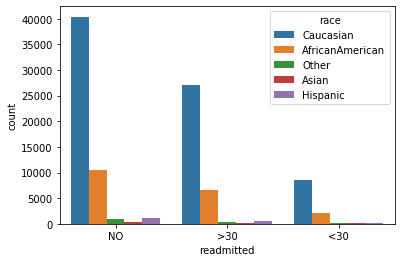

In [37]:
sns.countplot('readmitted_binary', hue = 'race', data = df_cat)

In [47]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [51]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

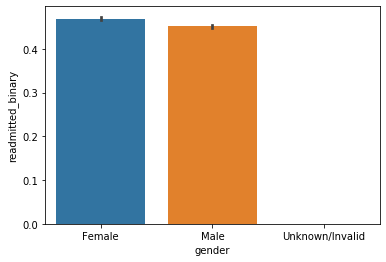

In [55]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [57]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [59]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

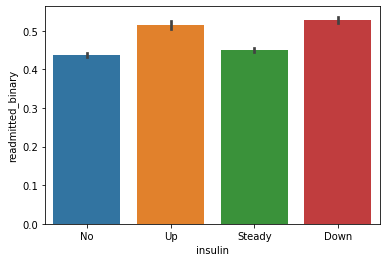

In [60]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [61]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [62]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

## Adding Readmitted Binary into DF2

In [64]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

(array([31410., 17745., 13918., 17495.,  5855.,  4388.,  5342.,  1854.,
         1448.,  2251.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

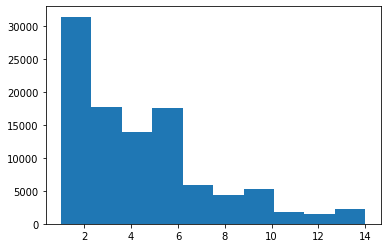

In [65]:
plt.hist(df2['time_in_hospital'])

In [68]:
stats.kruskal(df2['time_in_hospital'], df2['readmitted_binary'])

KruskalResult(statistic=nan, pvalue=nan)